## Observations and Insights 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
unique_mice_data_df = combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"] != "g989"]
unique_mice_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summarystats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())


summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


summarystats.head()

,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar and Pie Charts

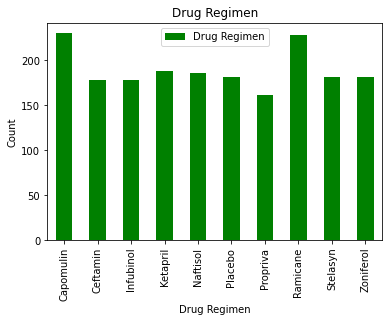

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group = combined_data.groupby('Drug Regimen')

drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())

count_chart = drug_group_count.plot(kind='bar', title="Drug Regimen", color="green")

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")

plt.show()
plt.tight_layout()

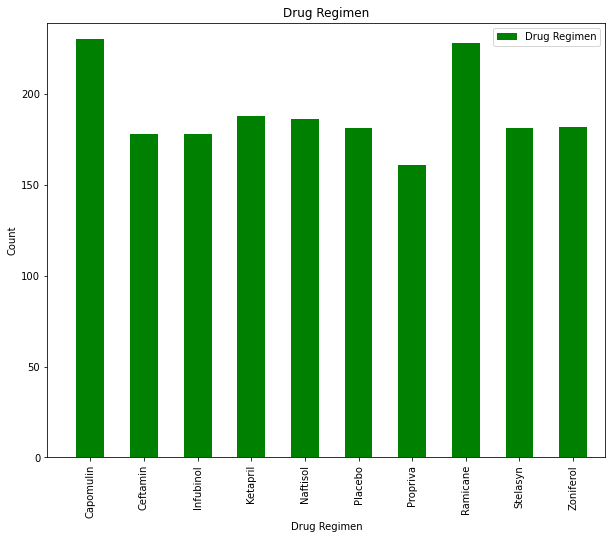

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='green', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

plt.xlim(-0.8, len(x_axis)-0.4)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.04)

plt.title("Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")



<AxesSubplot:title={'center':'Distribution of female versus male mice'}, ylabel='Sex'>

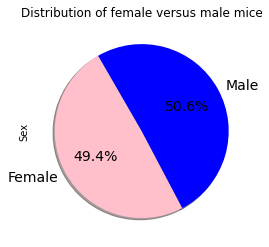

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_data.groupby('Sex')

gender_group_count = pd.DataFrame(gender_group['Sex'].count())

gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=120,\
                        autopct='%1.1f%%',shadow=True, fontsize=14, colors =["pink","blue"],legend =False)

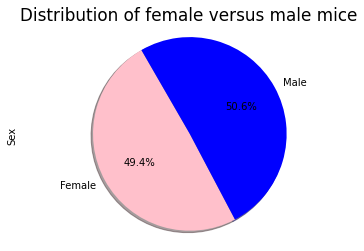

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)
               
gender_counts = gender_group_count['Sex']
               
colors = ["pink", "blue"]
               
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.rcParams['font.size'] = 14
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
               
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

drug_regimen_df = unique_mice_data_df[unique_mice_data_df ["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_regimen_df

last_timepoint_df = drug_regimen_df.groupby(["Mouse ID"]).max().reset_index()
last_timepoint_df

tumor_calc_df = last_timepoint_df[["Mouse ID", "Timepoint"]].merge(unique_mice_data_df, on=["Mouse ID", "Timepoint"])
tumor_calc_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_treatments = tumor_calc_df["Drug Regimen"].unique()
drug_treatments

tumor_vol_list = []

for drug in drug_treatments:
    #print(drug)
   
    drug_list = tumor_calc_df.loc[tumor_calc_df["Drug Regimen"] == drug]
    
    tumor_volume = drug_list["Tumor Volume (mm3)"]
    #print(tumor_volume) 
    
    tumor_vol_list.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{drug} :")
    print("____________________\n")
    print(f"The lower quartile of the tumor volume of {drug} is: {lowerq}")
    print(f"The upper quartile of the tumor volume of {drug} is: {upperq}")
    print(f"The interquartile range of the tumor volume of {drug} is: {iqr}")
    print(f"The median of the tumor volume of {drug} is: {quartiles[0.5]}")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.\n")
    




Infubinol :
____________________

The lower quartile of the tumor volume of Infubinol is: 54.04860769
The upper quartile of the tumor volume of Infubinol is: 65.52574285
The interquartile range of the tumor volume of Infubinol is: 11.477135160000003
The median of the tumor volume of Infubinol is: 60.16518046
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.

Ceftamin :
____________________

The lower quartile of the tumor volume of Ceftamin is: 48.72207785
The upper quartile of the tumor volume of Ceftamin is: 64.29983003
The interquartile range of the tumor volume of Ceftamin is: 15.577752179999997
The median of the tumor volume of Ceftamin is: 59.85195552
Values below 25.355449580000002 for Ceftamin could be outliers.
Values above 87.66645829999999 for Ceftamin could be outliers.

Ramicane :
____________________

The lower quartile of the tumor volume of Ramicane is: 31.56046955
The upper quartile of the tu

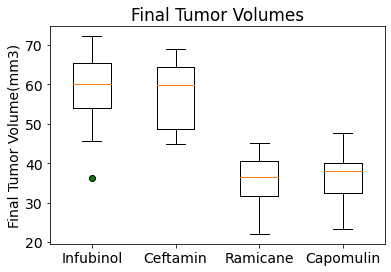

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_circle = dict(markerfacecolor = "g", marker = "o")
plt.boxplot(tumor_vol_list, labels=drug_treatments, flierprops=green_circle)

# Label x & y axis 
# Outlier shown in green
# https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
plt.ylabel("Final Tumor Volume(mm3)")
plt.title("Final Tumor Volumes")
plt.show()

## Line and Scatter Plots

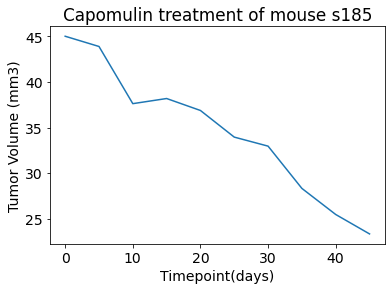

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Generate new df
capomulin_df = unique_mice_data_df[unique_mice_data_df ["Drug Regimen"].isin(["Capomulin"])]
capomulin_df

# Get data
# x axis = set
# Tumor volume
# Plot and set labels
mouse_s185  = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
mouse_s185

x_axis = np.arange(0, 50, 5)
x_axis

s185_volume = mouse_s185["Tumor Volume (mm3)"].tolist()
s185_volume

plt.plot(x_axis, s185_volume)
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

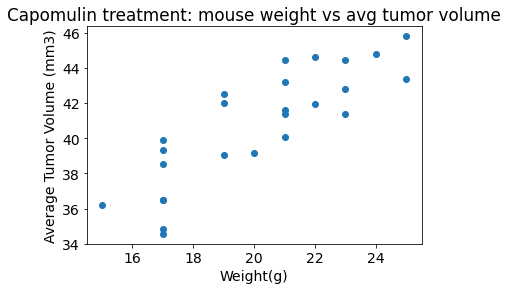

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = unique_mice_data_df[unique_mice_data_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_regimen 

# Bring in the 3 columns
capomulin_weight_tumor = capomulin_regimen[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
capomulin_weight_tumor

# Avg tumor volume per mouse
avg_tumor_vol = capomulin_weight_tumor.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
avg_tumor_vol

# Avg weight per mouse
mouse_weights = capomulin_weight_tumor.groupby(['Mouse ID']).mean()['Weight (g)']
mouse_weights

# Set labels plot scatter plot
plt.scatter(mouse_weights, avg_tumor_vol)
plt.title("Capomulin treatment: mouse weight vs avg tumor volume")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weights, avg_tumor_vol)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress = (mouse_weights, avg_tumor_vol)
linregress_values = mouse_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weights, avg_tumor_vol)
plt.plot(mouse_weights,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Capomulin treatment: mouse weight vs avg tumor volume")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and average tumor volume is 0.84


ValueError: not enough values to unpack (expected 5, got 2)